# Рубежный контроль №2
# Тема: Методы построения моделей машинного обучения

## Шкарин Е.А ИУ5-65Б Вариант 20

Загрузка необходимых библиотек:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.ensemble import AdaBoostClassifier
from sklearn.impute import SimpleImputer

In [ ]:
data = pd.read_csv('impeachment-polls.csv', sep=",")
TARGET_COL_NAME = 'Pollster'
TARGET_IS_NUMERIC = data[TARGET_COL_NAME].dtype != 'O'
TARGET_IS_NUMERIC

False

In [ ]:
data

,Start,End,Pollster,Sponsor,SampleSize,Pop,tracking,Text,Category,Include?,...,Rep Yes,Rep No,Dem Sample,Dem Yes,Dem No,Ind Sample,Ind Yes,Ind No,URL,Notes
0,6/28/2019,7/1/2019,ABC News/Washington Post,NaN,1008,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,7.0,87.0,292.0,61.0,36.0,373.0,37.0,59.0,https://games-cdn.washingtonpost.com/notes/pro...,NaN
1,4/22/2019,4/25/2019,ABC News/Washington Post,NaN,1001,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,10.0,87.0,290.0,62.0,29.0,360.0,36.0,59.0,https://games-cdn.washingtonpost.com/notes/pro...,NaN
2,1/21/2019,1/24/2019,ABC News/Washington Post,NaN,1001,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,7.0,90.0,320.0,64.0,30.0,370.0,42.0,53.0,langerresearch.com/wp-content/uploads/1204a2Tr...,NaN
3,8/26/2018,8/29/2018,ABC News/Washington Post,NaN,1003,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,15.0,82.0,331.0,75.0,21.0,371.0,49.0,46.0,https://www.langerresearch.com/wp-content/uplo...,NaN
4,6/8/2019,6/12/2019,Civiqs,NaN,1559,rv,NaN,Do you think the House of Representatives shou...,begin_inquiry,yes,...,5.0,93.0,577.0,77.0,15.0,499.0,41.0,53.0,https://civiqs.com/documents/Civiqs_DailyKos_m...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,1/29/2020,1/30/2020,Morning Consult,Politico,1992,rv,NaN,"As you may know, the Constitution gives the Ho...",impeach,yes,...,15.0,80.0,765.0,84.0,11.0,587.0,45.0,42.0,https://morningconsult.com/wp-content/uploads/...,NaN
538,1/29/2020,1/30/2020,Morning Consult,Politico,1992,rv,NaN,"And, would you approve or disapprove of the Se...",remove,yes,...,13.0,82.0,765.0,84.0,11.0,587.0,45.0,42.0,https://morningconsult.com/wp-content/uploads/...,NaN
539,1/26/2020,1/29/2020,NBC News/Wall Street Journal,NaN,1000,rv,NaN,Thinking now about the impeachment trial again...,remove,yes,...,NaN,91.0,320.0,84.0,NaN,310.0,45.0,50.0,https://www.nbcnews.com/politics/meet-the-pres...,NaN
540,1/30/2020,2/2/2020,AtlasIntel,NaN,1600,rv,NaN,Do you think President Trump should be impeach...,impeach_and_remove,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://projects.fivethirtyeight.com/polls/201...,NaN


In [ ]:
data.shape

(542, 24)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Start       542 non-null    object 
 1   End         542 non-null    object 
 2   Pollster    542 non-null    object 
 3   Sponsor     276 non-null    object 
 4   SampleSize  542 non-null    int64  
 5   Pop         542 non-null    object 
 6   tracking    114 non-null    object 
 7   Text        541 non-null    object 
 8   Category    541 non-null    object 
 9   Include?    542 non-null    object 
 10  Yes         542 non-null    float64
 11  No          542 non-null    float64
 12  Unsure      521 non-null    float64
 13  Rep Sample  475 non-null    float64
 14  Rep Yes     509 non-null    float64
 15  Rep No      492 non-null    float64
 16  Dem Sample  477 non-null    float64
 17  Dem Yes     515 non-null    float64
 18  Dem No      491 non-null    float64
 19  Ind Sample  409 non-null    f

In [ ]:
# проверим есть ли пропущенные значения
data.isnull().sum()

### Удалим колонки, которые не влияют на целевой признак

Построим heatmap для лучшего визуального представления всез корреляций

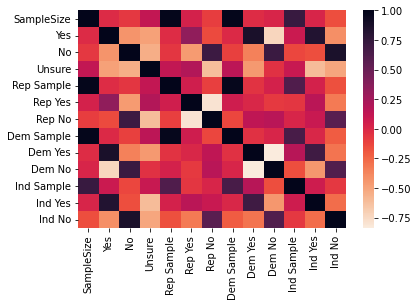

In [ ]:
cmap = sns.cm.rocket_r
ax = sns.heatmap(data.corr(), cmap=cmap)

In [ ]:
data = data.drop(columns=['Sponsor', 'Ind Sample', 'tracking', 'Notes'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Start       542 non-null    object 
 1   End         542 non-null    object 
 2   Pollster    542 non-null    object 
 3   SampleSize  542 non-null    int64  
 4   Pop         542 non-null    object 
 5   Text        541 non-null    object 
 6   Category    541 non-null    object 
 7   Include?    542 non-null    object 
 8   Yes         542 non-null    float64
 9   No          542 non-null    float64
 10  Unsure      521 non-null    float64
 11  Rep Sample  475 non-null    float64
 12  Rep Yes     509 non-null    float64
 13  Rep No      492 non-null    float64
 14  Dem Sample  477 non-null    float64
 15  Dem Yes     515 non-null    float64
 16  Dem No      491 non-null    float64
 17  Ind Yes     447 non-null    float64
 18  Ind No      430 non-null    float64
 19  URL         541 non-null    o

### Обработка пропусков

In [ ]:
# Импьютация наиболее частыми значениями
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imputed = {}

for col in data:
    contains_nan = data[col].isnull().sum() != 0
    if contains_nan:
        data_imp = data[[col]]
        data_imp = imp.fit_transform(data_imp)
        imputed[col] = data_imp

for col_name in imputed:
    df = pd.DataFrame({col_name:imputed[col_name].T[0]})
    data[col_name] = df.copy()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Start       542 non-null    object 
 1   End         542 non-null    object 
 2   Pollster    542 non-null    object 
 3   SampleSize  542 non-null    int64  
 4   Pop         542 non-null    object 
 5   Text        542 non-null    object 
 6   Category    542 non-null    object 
 7   Include?    542 non-null    object 
 8   Yes         542 non-null    float64
 9   No          542 non-null    float64
 10  Unsure      542 non-null    float64
 11  Rep Sample  542 non-null    float64
 12  Rep Yes     542 non-null    float64
 13  Rep No      542 non-null    float64
 14  Dem Sample  542 non-null    float64
 15  Dem Yes     542 non-null    float64
 16  Dem No      542 non-null    float64
 17  Ind Yes     542 non-null    float64
 18  Ind No      542 non-null    float64
 19  URL         542 non-null    o

### Кодирование строковых признаков (LabelEncoding)

In [ ]:
not_number_cols = data.select_dtypes(include=['object'])
number_cols = data.select_dtypes(exclude=['object'])

In [ ]:
le = preprocessing.LabelEncoder()

for col_name in not_number_cols:
    data[col_name] = le.fit_transform(data[col_name])
    
data

,Start,End,Pollster,SampleSize,Pop,Text,Category,Include?,Yes,No,Unsure,Rep Sample,Rep Yes,Rep No,Dem Sample,Dem Yes,Dem No,Ind Yes,Ind No,URL
0,263,257,0,1008,0,35,1,1,37.0,59.0,4.0,232.0,7.0,87.0,292.0,61.0,36.0,37.0,59.0,93
1,228,218,0,1001,0,35,1,1,37.0,56.0,6.0,260.0,10.0,87.0,290.0,62.0,29.0,36.0,59.0,94
2,16,18,0,1001,0,35,1,1,40.0,55.0,6.0,240.0,7.0,90.0,320.0,64.0,30.0,42.0,53.0,306
3,299,283,0,1003,0,35,1,1,49.0,46.0,5.0,251.0,15.0,82.0,331.0,75.0,21.0,49.0,46.0,235
4,271,244,6,1559,2,89,0,1,43.0,51.0,5.0,483.0,5.0,93.0,577.0,77.0,15.0,41.0,53.0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,32,30,18,1992,2,13,4,1,50.0,43.0,7.0,641.0,15.0,80.0,765.0,84.0,11.0,45.0,42.0,126
538,32,30,18,1992,2,5,7,1,50.0,43.0,14.0,641.0,13.0,82.0,765.0,84.0,11.0,45.0,42.0,126
539,27,27,19,1000,2,117,7,1,46.0,49.0,5.0,300.0,12.0,91.0,320.0,84.0,11.0,45.0,50.0,250
540,36,164,2,1600,2,72,5,1,48.7,48.2,3.1,320.0,12.0,82.0,370.0,85.0,11.0,36.0,45.0,157


### Масштабируем числовые данные

In [ ]:
scaler = preprocessing.MinMaxScaler()

number_fields_source = number_cols.loc[:, number_cols.columns!=TARGET_COL_NAME] if TARGET_IS_NUMERIC else number_cols

for col_name in number_fields_source:
    data[col_name] = scaler.fit_transform(data[[col_name]])

data

,Start,End,Pollster,SampleSize,Pop,Text,Category,Include?,Yes,No,Unsure,Rep Sample,Rep Yes,Rep No,Dem Sample,Dem Yes,Dem No,Ind Yes,Ind No,URL
0,263,257,0,0.034294,0,35,1,1,0.272727,0.815789,0.111111,0.014654,0.185185,0.696970,0.018689,0.190476,0.941176,0.357143,0.796296,93
1,228,218,0,0.033898,0,35,1,1,0.272727,0.736842,0.185185,0.018045,0.296296,0.696970,0.018397,0.214286,0.735294,0.333333,0.796296,94
2,16,18,0,0.033898,0,35,1,1,0.363636,0.710526,0.185185,0.015623,0.185185,0.787879,0.022777,0.261905,0.764706,0.476190,0.685185,306
3,299,283,0,0.034011,0,35,1,1,0.636364,0.473684,0.148148,0.016955,0.481481,0.545455,0.024383,0.523810,0.500000,0.642857,0.555556,235
4,271,244,6,0.065424,2,89,0,1,0.454545,0.605263,0.148148,0.045053,0.111111,0.878788,0.060301,0.571429,0.323529,0.452381,0.685185,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,32,30,18,0.089887,2,13,4,1,0.666667,0.394737,0.222222,0.064188,0.481481,0.484848,0.087750,0.738095,0.205882,0.547619,0.481481,126
538,32,30,18,0.089887,2,5,7,1,0.666667,0.394737,0.481481,0.064188,0.407407,0.545455,0.087750,0.738095,0.205882,0.547619,0.481481,126
539,27,27,19,0.033842,2,117,7,1,0.545455,0.552632,0.148148,0.022890,0.370370,0.818182,0.022777,0.738095,0.205882,0.547619,0.629630,250
540,36,164,2,0.067740,2,72,5,1,0.627273,0.531579,0.077778,0.025312,0.370370,0.545455,0.030077,0.761905,0.205882,0.333333,0.537037,157


### Делим выборку на обучающую и тестовую

In [ ]:
target = data[TARGET_COL_NAME]
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(
    data, target, test_size=0.2, random_state=1)

In [ ]:
data_X_train.shape, data_y_train.shape

((433, 20), (433,))

In [ ]:
data_X_test.shape, data_y_test.shape

((109, 20), (109,))

In [ ]:
np.unique(target)

### Метод опорных векторов

In [ ]:
svr_1 = svm.LinearSVC()
svr_1.fit(data_X_train, data_y_train)

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [ ]:
data_y_pred_1 = svr_1.predict(data_X_test)
accuracy_score(data_y_test, data_y_pred_1)

0.03669724770642202

In [ ]:
f1_score(data_y_test, data_y_pred_1, average='micro')

0.03669724770642202

In [ ]:
f1_score(data_y_test, data_y_pred_1, average='macro')

0.05555555555555555

In [ ]:
f1_score(data_y_test, data_y_pred_1, average='weighted')

0.046890927624872576

In [ ]:
svr_2 = svm.LinearSVC(C=1.0, max_iter=10000)
svr_2.fit(data_X_train, data_y_train)

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=10000)

In [ ]:
data_y_pred_2 = svr_2.predict(data_X_test)
accuracy_score(data_y_test, data_y_pred_2)

0.01834862385321101

In [ ]:
f1_score(data_y_test, data_y_pred_2, average='micro')

0.01834862385321101

In [ ]:
f1_score(data_y_test, data_y_pred_2, average='macro')

0.017094017094017096

In [ ]:
f1_score(data_y_test, data_y_pred_2, average='weighted')

0.02854230377166157

In [ ]:
svr_3 = svm.LinearSVC(C=1.0, penalty='l1', dual=False, max_iter=10000)
svr_3.fit(data_X_train, data_y_train)

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(dual=False, max_iter=10000, penalty='l1')

In [ ]:
data_y_pred_3_0 = svr_3.predict(data_X_train)
accuracy_score(data_y_train, data_y_pred_3_0)

0.9191685912240185

In [ ]:
data_y_pred_3 = svr_3.predict(data_X_test)
accuracy_score(data_y_test, data_y_pred_3)

0.8165137614678899

In [ ]:
f1_score(data_y_test, data_y_pred_3, average='micro')

0.81651376146789

In [ ]:
f1_score(data_y_test, data_y_pred_3, average='macro')

0.615193502150024

In [ ]:
f1_score(data_y_test, data_y_pred_3, average='weighted')

0.7892764727627112

### Градиентный бустинг

In [ ]:
ab1 = AdaBoostClassifier()
ab1.fit(data_X_train, data_y_train)
data_y_pred_1 = ab1.predict(data_X_test)
data_y_pred_1_0 = ab1.predict(data_X_train)
accuracy_score(data_y_train, data_y_pred_1_0)

0.5127020785219399

In [ ]:
accuracy_score(data_y_test, data_y_pred_1)

0.42201834862385323

In [ ]:
f1_score(data_y_test, data_y_pred_1, average='micro')

0.42201834862385323

In [ ]:
f1_score(data_y_test, data_y_pred_1, average='macro')

0.10816542948038176

In [ ]:
f1_score(data_y_test, data_y_pred_1, average='weighted')

0.2810472141418662

### Выводы

При использовании метода опорных векторов наилучшая точность была 0.919. В целом можно было бы и дальше подбирать параметры и добиться лучшего результата, однако при градиентном бустинге показатели гораздо выше и поэтому он более эффективен.